In [1]:
"""Test Qiskit implementation of BPQM decoding - comprehensive tests based on main.ipynb."""

import numpy as np
import sys
import os
from qiskit import QuantumCircuit  # This is the actual Qiskit package
from qiskit_impl.linearcode import LinearCode
from qiskit_impl.cloner import VarNodeCloner, ExtendedVarNodeCloner
from qiskit_impl.decoders import (
    decode_bpqm, 
    decode_single_codeword, 
    decode_single_syndrome, 
    create_init_qc
)


import cirq
from cirq_impl.linearcode import CirqLinearCode
from cirq_impl.cloner import CirqVarNodeCloner, CirqExtendedVarNodeCloner
from cirq_impl.decoders import (
    create_init_qc as create_init_qc_cirq,
    decode_single_syndrome as decode_single_syndrome_cirq
)

In [2]:
B = np.array([[1, 0, 0, 1],
              [0, 1, 1, 0],
              [1, 0, 0, 1],
              [0, 1, 0, 0],
              [0, 1, 0, 1]])

H = B.T
# H = np.array([
#     [1, 0, 0, 0, 1],
#     [0, 1, 0, 1, 0],
#     [0, 0, 1, 0, 1],
#     [0, 1, 0, 1, 1],
# ])
# H = np.array([
#     [1, 1, 0, 0, 1, 0, 0, 0],
#     [0, 1, 1, 0, 0, 1, 0, 0],
#     [0, 0, 1, 1, 0, 0, 1, 0],
#     [1, 0, 0, 1, 0, 0, 0, 1],
# ])
theta = 0.2 * np.pi
cloner = VarNodeCloner(theta)
code = LinearCode(None, H)


corrupted_codeword = np.array([1, 1, 0, 1, 1])
syndrome = corrupted_codeword @ H.T %2
syndrome

array([1, 1, 1, 0])

In [3]:
syndrome_qc = QuantumCircuit(len(syndrome))
for i, s in enumerate(syndrome):
    if s == 1:
        syndrome_qc.x(i)

decoded_bits, decoded_qubits, qc_decode = decode_single_syndrome(
    syndrome_qc=syndrome_qc,
    code=code,
    prior=0.5,
    theta=theta,
    height=2,
    shots=10000,
    debug=True,
    run_simulation=True
)
print("syndrome             : ", syndrome)
print("Corrupted codeword   : ", corrupted_codeword)
print("Decoded bits         : ", decoded_bits)
if decoded_bits is not None:
    print("Decoded bits syndrome: ", decoded_bits @ H.T %2)

[np.float64(3.3372769950712198), np.float64(4.623533867826844)] [np.float64(-0.17579186917651723), np.float64(-1.1104650035791128)]
[np.float64(3.8696440892808663)] [np.float64(-0.6416414184294066)]
[np.float64(3.5960777474214844), np.float64(4.712388980384689)] [np.float64(-0.40591540391133707), np.float64(-1.1185178796437052)]
[np.float64(4.419506821266482), np.float64(3.6065375470976124), np.float64(3.878808477024463), np.float64(3.878808477024463), np.float64(4.6851157025622605), np.float64(4.533962597666548), np.float64(4.613085557526823), np.float64(4.613085557526822)] [np.float64(-1.242755468855437), np.float64(0.07090391611264613), np.float64(-0.598493184064721), np.float64(-0.5984931840647203), np.float64(-1.418426785738322), np.float64(0.15612844521237124), np.float64(-0.9862731442432422), np.float64(-0.9862731442432411)]
[np.float64(4.105862293674544), np.float64(4.764260092201976), np.float64(4.320828172961124), np.float64(4.320828172961123), np.float64(4.646954440805293), 

In [4]:
n_ancilla = len(syndrome)
ancilla_qubits = [cirq.LineQubit(i) for i in range(n_ancilla)]
syndrome_qc = cirq.Circuit()

for i, s in enumerate(syndrome):
    if s == 1:
        syndrome_qc.append(cirq.X(ancilla_qubits[i]))

decoded_bits, decoded_qubits, qc_decode_cirq = decode_single_syndrome_cirq(
    syndrome_qc=syndrome_qc,
    code=code,
    prior=0.5,
    theta=theta,
    height=2,
    shots=10000,
    debug=True,
    run_simulation=True
)
print("syndrome             : ", syndrome)
print("Corrupted codeword   : ", corrupted_codeword)
print("Decoded bits         : ", decoded_bits)
if decoded_bits is not None:
    print("Decoded bits syndrome: ", decoded_bits @ H.T %2)

[np.float64(3.3372769950712198), np.float64(4.623533867826844)] [np.float64(-0.17579186917651723), np.float64(-1.1104650035791128)]
[np.float64(3.8696440892808663)] [np.float64(-0.6416414184294066)]
[np.float64(3.5960777474214844), np.float64(4.712388980384689)] [np.float64(-0.40591540391133707), np.float64(-1.1185178796437052)]
[np.float64(4.419506821266482), np.float64(3.6065375470976124), np.float64(3.878808477024463), np.float64(3.878808477024463), np.float64(4.6851157025622605), np.float64(4.533962597666548), np.float64(4.613085557526823), np.float64(4.613085557526822)] [np.float64(-1.242755468855437), np.float64(0.07090391611264613), np.float64(-0.598493184064721), np.float64(-0.5984931840647203), np.float64(-1.418426785738322), np.float64(0.15612844521237124), np.float64(-0.9862731442432422), np.float64(-0.9862731442432411)]
[np.float64(4.105862293674544), np.float64(4.764260092201976), np.float64(4.320828172961124), np.float64(4.320828172961123), np.float64(4.646954440805293), 

In [5]:
from qiskit import QuantumCircuit
qc = QuantumCircuit.from_qasm_str(qc_decode_cirq.to_qasm(version="2.0"))



In [6]:
qc.

SyntaxError: invalid syntax (1942852123.py, line 1)

In [32]:
from qiskit_aer import AerSimulator
from qiskit import transpile

sim = AerSimulator()
# Specify Aer’s native gates: 'u' (universal single-qubit), 'cx', and 'id'
tqc = transpile(qc, sim, basis_gates=['u', 'cx'])
qc_decode_transpiled = transpile(qc_decode, sim, basis_gates=['u', 'cx'])
cir = qc_decode_transpiled.compose(tqc.inverse())
cir.measure_all()
result = sim.run(cir, shots=10000).result()
sorted(result.get_counts().items(), key=lambda x: x[1], reverse=True)

[('000000000001010000', 1055),
 ('000000000000000000', 1040),
 ('000000000110100000', 533),
 ('000000000111110000', 370),
 ('000000000011110000', 317),
 ('000010000000000000', 273),
 ('001000000000000000', 241),
 ('001000000110100000', 200),
 ('000010000110100000', 174),
 ('001000000001010000', 151),
 ('000010000001010000', 145),
 ('000100000001010000', 125),
 ('000010000111110000', 104),
 ('001000000111110000', 95),
 ('100000000000000000', 95),
 ('000000001101000000', 93),
 ('000000000010100000', 89),
 ('100000000001010000', 86),
 ('000100000011110000', 81),
 ('100000010100010000', 73),
 ('000100000110100000', 73),
 ('000000001100010000', 70),
 ('010000000110100000', 69),
 ('000100000000000000', 68),
 ('010000000000000000', 68),
 ('010000000011110000', 67),
 ('010000000001010000', 61),
 ('001000100011100000', 56),
 ('100000010101000000', 53),
 ('001000001101000000', 52),
 ('000000010101000000', 51),
 ('000000100011100000', 51),
 ('010000000111110000', 49),
 ('000000010100010000', 46),

In [5]:
from qiskit.transpiler.passes import RemoveBarriers
rb = RemoveBarriers()
circuit_out = rb(qc_decode)

In [6]:
circuit_out

In [7]:
qc_decode.count_ops()

OrderedDict([('cx', 173),
             ('x', 72),
             ('cz', 36),
             ('ucry', 36),
             ('ucry_dg', 36),
             ('ry', 18),
             ('barrier', 15),
             ('h', 10)])

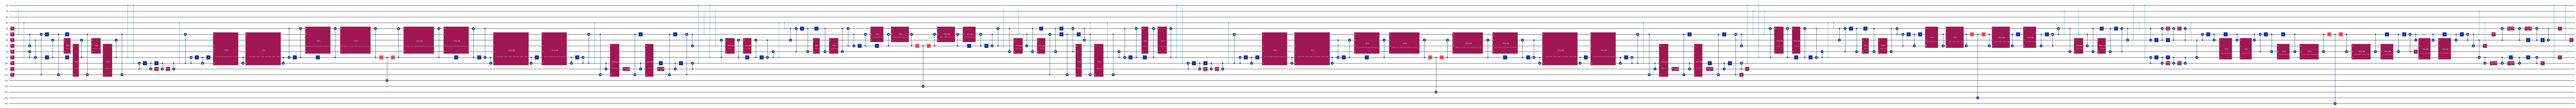

In [ ]:

from cirq.contrib.svg import circuit_to_svg

# circuit_to_svg returns an SVG string directly
svg_str = circuit_to_svg(qc_decode_cirq)
with open("cirq_circuit_alt.svg", "w") as f:
    f.write(svg_str)

circuit_out.draw('mpl', fold=-1, filename='qiskit_circuit.svg')

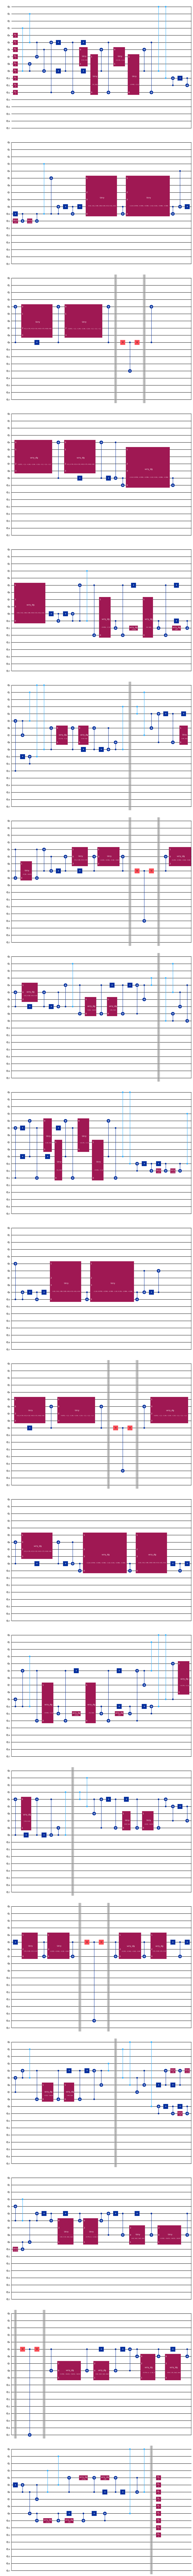

In [9]:
qc_decode.draw('mpl')

In [10]:
ResourceWarning

ResourceWarning